In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the data
datos = pl.read_csv("/home/thermostatic/Desktop/Uni code/Ratas/datos/Sanas/S3/S3s1DV100.csv", skip_rows=12)

# Calculate time differences
time_diff = np.diff(datos["Time"])

In [3]:
# Calculate position differences
displacement_x = np.diff(datos["X"])
displacement_y = np.diff(datos["Y"])

# Calculate velocity using finite difference method
velocity_x = displacement_x / time_diff
velocity_y = displacement_y / time_diff

# Calculate acceleration using finite difference method
acceleration_x = np.diff(velocity_x) / time_diff[:-1]
acceleration_y = np.diff(velocity_y) / time_diff[:-1]

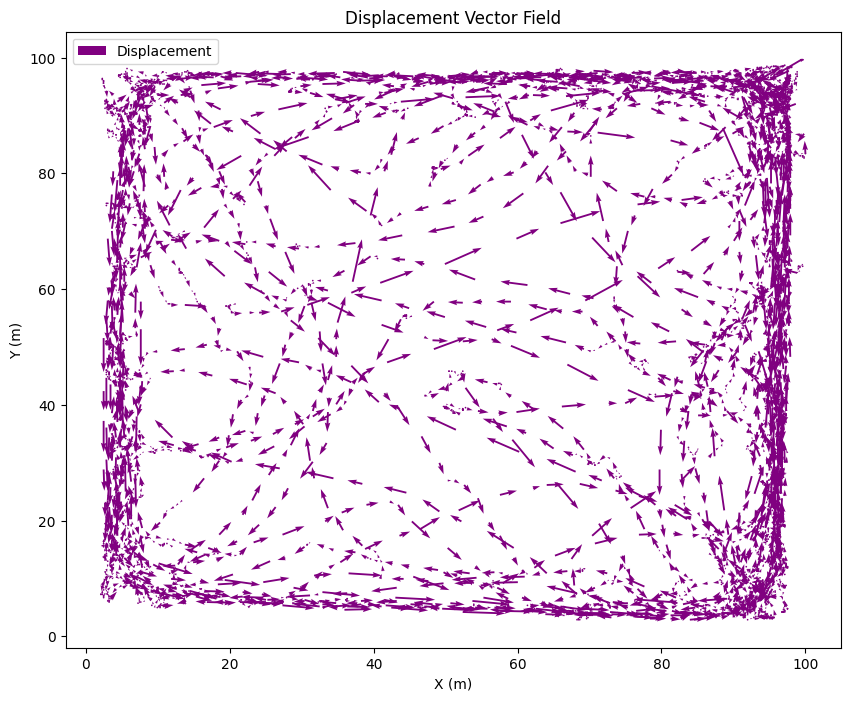

In [4]:
# Plot the vector field with position given by X and Y
plt.figure(figsize=(10, 8))
plt.quiver(datos["X"][:-1], datos["Y"][:-1], displacement_x, displacement_y, 
           color='purple', label='Displacement')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Displacement Vector Field')
plt.legend()

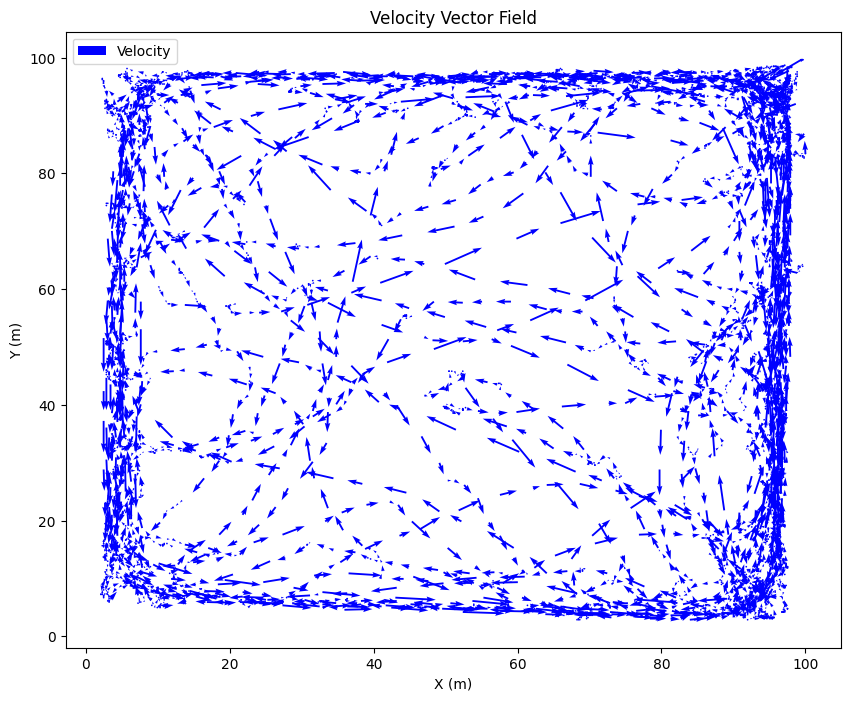

In [5]:
# Create a vector field plot for velocity
plt.figure(figsize=(10, 8))
plt.quiver(datos["X"][:-1], datos["Y"][:-1], velocity_x, velocity_y, 
           color='blue', label='Velocity')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Velocity Vector Field')
plt.legend()

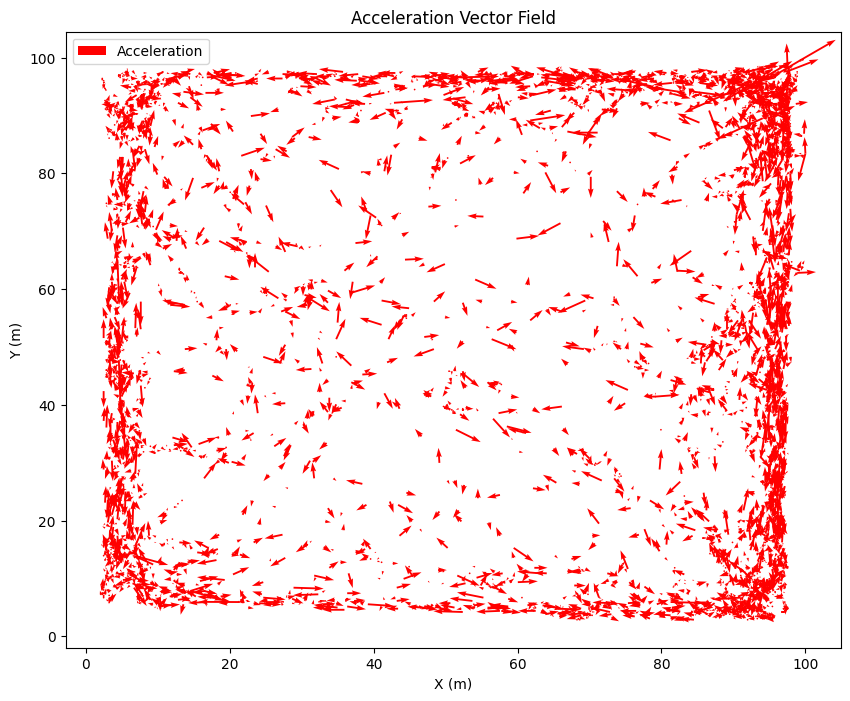

In [6]:
# Create a vector field plot for acceleration
plt.figure(figsize=(10, 8))
plt.quiver(datos["X"][:-2], datos["Y"][:-2], acceleration_x, acceleration_y, 
           color='red', label='Acceleration')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Acceleration Vector Field')
plt.legend()

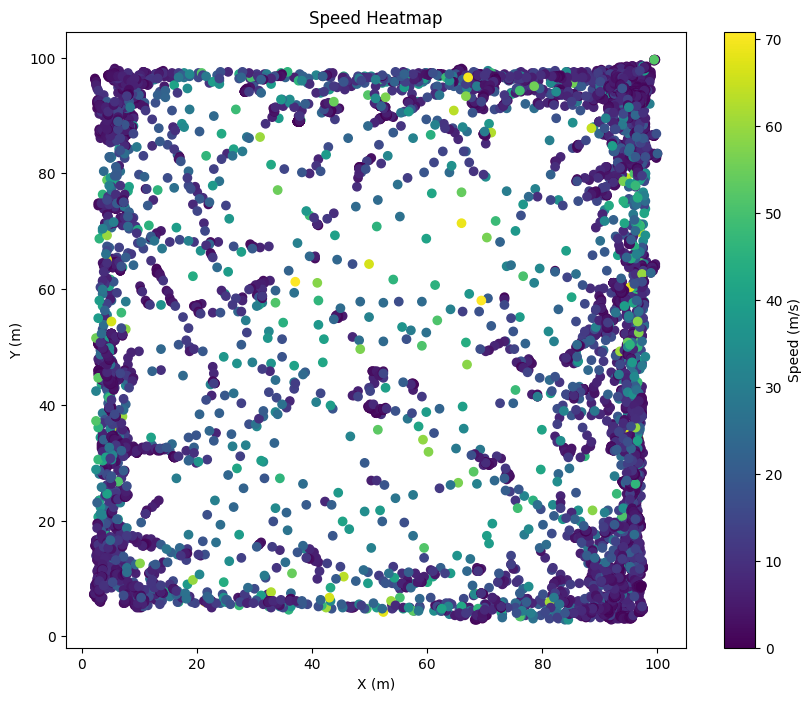

In [7]:
# Calculate speed
speed = np.sqrt(velocity_x**2 + velocity_y**2)

# Add a zero at the end to match the length of the position data
speed = np.append(speed, 0)

# Create a heatmap of the speed
plt.figure(figsize=(10, 8))
plt.scatter(datos["X"], datos["Y"], c=speed, cmap='viridis')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Speed Heatmap')
plt.colorbar(label='Speed (m/s)')

In [8]:
# Assume a mass of 0.25 kg for the rat
mass = 250

# Calculate the force in the x and y directions
force_x = mass * acceleration_x
force_y = mass * acceleration_y

# Create a new dataframe for the force data
force_data = pl.DataFrame({
    "Time": datos["Time"][:-2],  # adjust the time array to match the length of acceleration
    "Force_X": force_x,
    "Force_Y": force_y
})

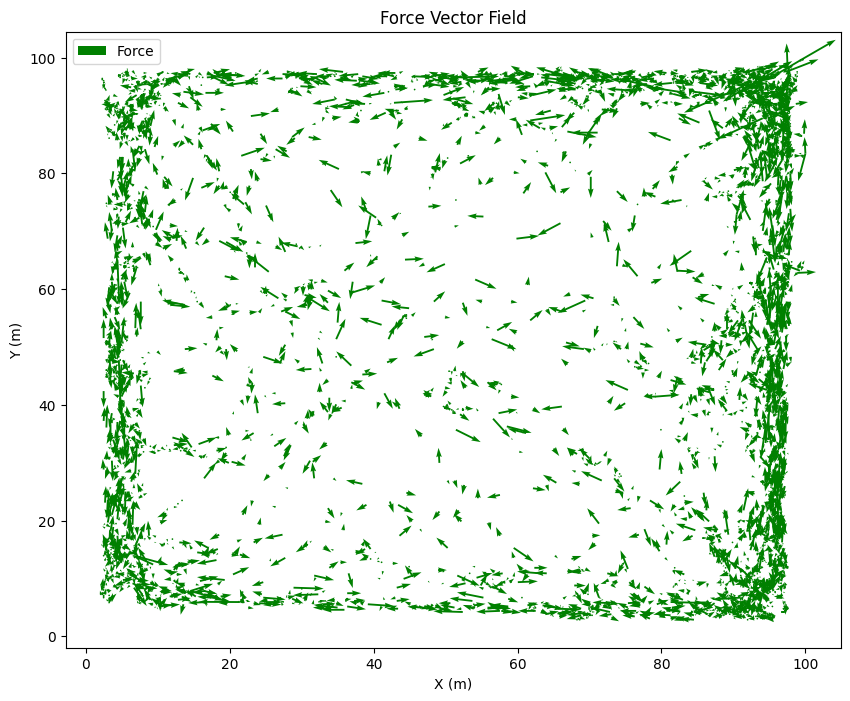

In [9]:
# Create a vector field plot for the force
plt.figure(figsize=(10, 8))
plt.quiver(datos["X"][:-2], datos["Y"][:-2], force_x, force_y, 
           color='green', label='Force')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Force Vector Field')
plt.legend()

In [10]:
# Calculate work done
work_x = force_x * displacement_x[:-1]
work_y = force_y * displacement_y[:-1]

work_total = np.sum(work_x) + np.sum(work_y)
work_total

-86508264.88390204

In [11]:
np.sum(work_x)

-40228093.79038434

In [12]:
np.sum(work_y)

-46280171.09351771